<a href="https://colab.research.google.com/github/NizarArdansyah/Capstone-Project-Machine-Learning/blob/main/Crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [ ]:
data_df = pd.read_csv('Crop_recommendation.csv')
#data_df = pd.read_csv('Crop_recommendation.csv', index_col='label')
data_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [53]:
data_df.describe()

,temperature,humidity
count,2114.000000,2114.000000
mean,25.530818,70.807972
std,4.230384,22.428521
min,14.343205,14.258040
25%,22.890858,59.341552
50%,25.563850,80.120570
75%,28.363527,89.298894
max,37.131650,99.981876


In [ ]:
data_df.shape

(2200, 8)

In [ ]:
data_df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
data_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data_df[data_df.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


In [ ]:
data_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data_df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Identifikasi Nilai Outlier

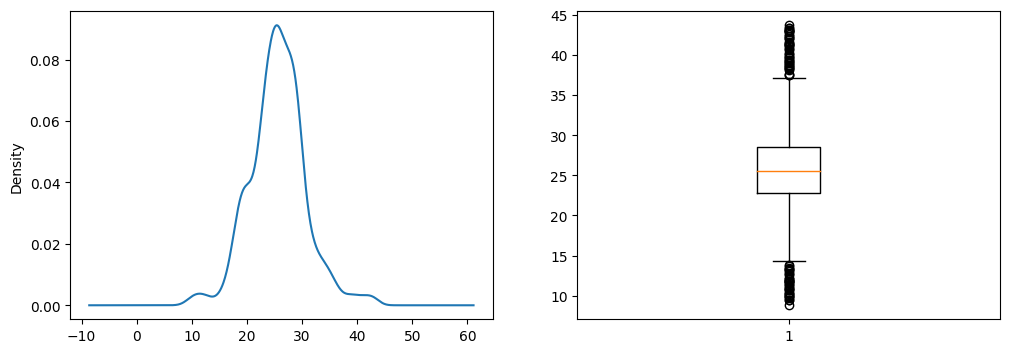

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['temperature'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['temperature'])
plt.show()

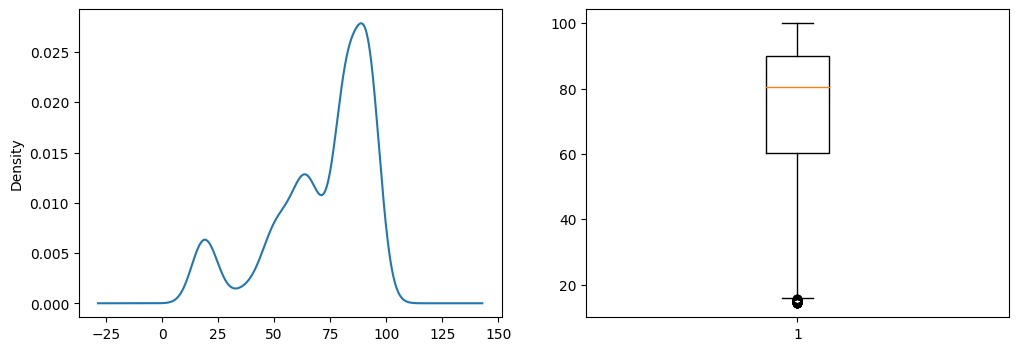

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data_df['humidity'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data_df['humidity'])
plt.show()

<Axes: xlabel='temperature'>

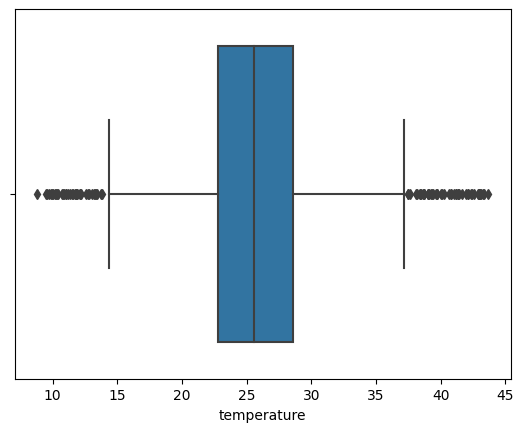

In [ ]:
sns.boxplot(x=data_df['temperature'])

<Axes: xlabel='humidity'>

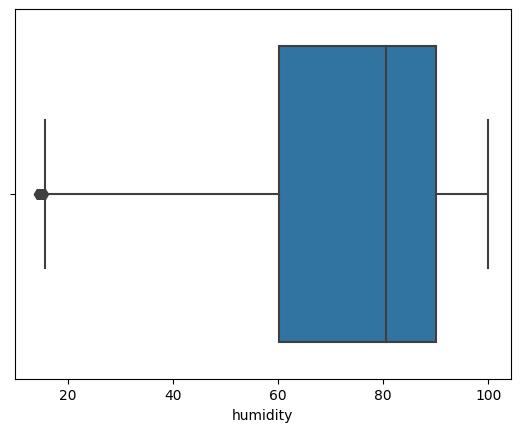

In [ ]:
sns.boxplot(x=data_df['humidity'])

# Normalisasi data

In [ ]:
data_df = data_df.drop(['N', 'P', 'K', 'ph', 'rainfall'], axis = 1)
data_df.head()

,temperature,humidity,label
0,20.879744,82.002744,rice
1,21.770462,80.319644,rice
2,23.004459,82.320763,rice
3,26.491096,80.158363,rice
4,20.130175,81.604873,rice


In [ ]:
Q1 = data_df['temperature'].quantile(0.25)
Q3 = data_df['temperature'].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 22.7693746325

Q3:
 28.5616539325

IQR:
 5.792279300000001

Min:
 14.080955682499999

Max:
 37.2500728825


In [ ]:
filter_min = data_df['temperature']<boxplot_min
filter_max = data_df['temperature']>boxplot_max
data_df = data_df[~(filter_min|filter_max)] 
data_df.shape

(2114, 3)

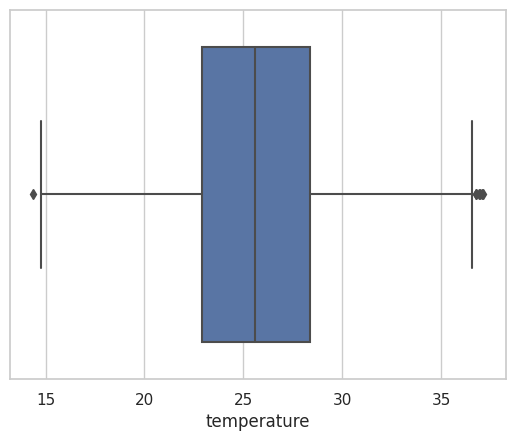

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data_df['temperature'])

In [ ]:
data_df.isnull().sum()

temperature    0
humidity       0
label          0
dtype: int64

In [ ]:
# backup dataframe for encoding
data_df.to_csv('data_df.csv')
df_clean = data_df.copy()

In [ ]:
df_clean.tail()

,temperature,humidity,label
2195,26.774637,66.413269,coffee
2196,27.417112,56.636362,coffee
2197,24.131797,67.225123,coffee
2198,26.272418,52.127394,coffee
2199,23.603016,60.396475,coffee


In [ ]:
for feat in df_clean.columns:
    hh = df_clean.groupby(feat)['label'].count()
    print(feat,',', 'Unique :',len(df_clean[feat].unique()))

temperature , Unique : 2114
humidity , Unique : 2114
label , Unique : 22


In [ ]:
df_clean.to_csv('data_cleaned.csv')

# Visualisasi data

<ipython-input-25-3905aa958fbb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df_clean.corr(), annot=True)


<Axes: >

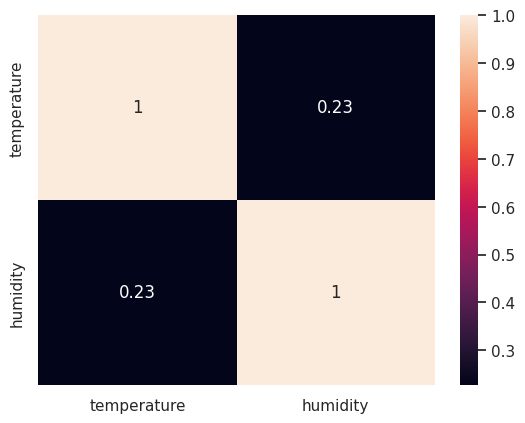

In [ ]:
sns.heatmap(data=df_clean.corr(), annot=True)

In [ ]:
df_clean.corr()

<ipython-input-26-798b28326b09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,temperature,humidity
temperature,1.000000,0.228011
humidity,0.228011,1.000000


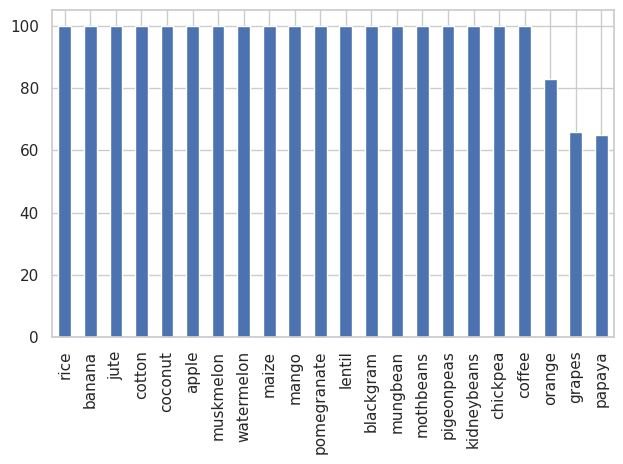

In [ ]:
df_clean['label'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

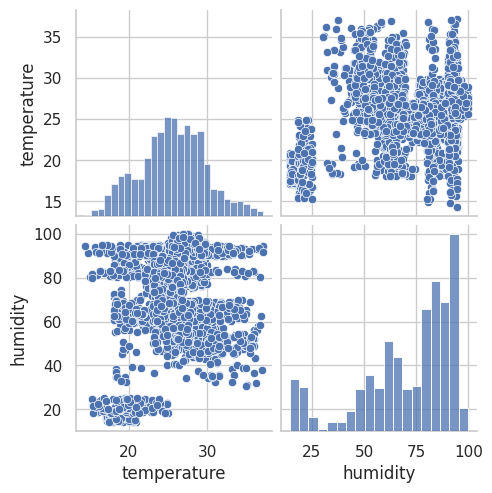

In [ ]:
sns.pairplot(df_clean[[ 'temperature', 'humidity']])

In [ ]:
X = data_df[data_df.columns[:-1]].values
y = data_df[data_df.columns[-1]].values

# **Klasifikasi model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn import tree

# **Dataset features dan class label**

In [ ]:
X = df_clean[['temperature', 'humidity']] #input features ke dalam x
X.head()

,temperature,humidity
0,20.879744,82.002744
1,21.770462,80.319644
2,23.004459,82.320763
3,26.491096,80.158363
4,20.130175,81.604873


In [ ]:
y = df_clean['label'] #label masuk ke variabel y
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

# **Split dataset ke training set dan testing set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('training dataset:')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset:
(1691, 2)
(1691,)

testing dataset:
(423, 2)
(423,)


# **Decission tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 

# Decission tree

In [ ]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(X_train,y_train)
predicted_values = DecisionTree.predict(X_test)

**Accuracy** **Score**

In [ ]:
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("DecisionTrees's Accuracy Score is: ", x)

DecisionTrees's Accuracy Score is:  0.5390070921985816


**Classification report**

In [ ]:
print(classification_report(y_test,predicted_values)) #classification report

              precision    recall  f1-score   support

       apple       0.46      0.92      0.61        12
      banana       1.00      0.29      0.44        21
   blackgram       0.53      0.91      0.67        22
    chickpea       0.67      1.00      0.80        18
     coconut       1.00      0.53      0.69        19
      coffee       0.59      0.50      0.54        20
      cotton       0.55      0.44      0.49        27
      grapes       0.00      0.00      0.00        10
        jute       0.38      0.19      0.26        26
 kidneybeans       1.00      0.65      0.79        26
      lentil       0.00      0.00      0.00        25
       maize       0.23      0.43      0.30        21
       mango       0.71      0.94      0.81        16
   mothbeans       0.00      0.00      0.00        17
    mungbean       0.61      1.00      0.75        20
   muskmelon       0.47      1.00      0.64        17
      orange       1.00      0.19      0.32        16
      papaya       0.60    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion matrix**

In [ ]:
print(confusion_matrix(y_test, predicted_values)) #confusion matrix

[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  6  0  0  0  0  4  0  0  0  0  0  0  0 10  0  0  0  0  0  1  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  7  0]
 [ 0  0  3  0  0  0  6  0  5  0  0  0  0  0  0  0  0  0  0  2  5  5]
 [ 0  0  0  9  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0  8  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  1  0  0  0]
 [ 0  0  6  0  0  2  0  0  0  0  0  0  2  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, X, y,cv=5)
score

array([0.58865248, 0.57919622, 0.56973995, 0.56264775, 0.59004739])

# KNN

In [ ]:
accuracies = []
for k in range(1, 25):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    y_pred_test = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)
for k in range(1,25):
    print("k = ", k, " => Akurasi = ", np.round(accuracies[k-1], 2)) 

k =  1  => Akurasi =  0.57
k =  2  => Akurasi =  0.58
k =  3  => Akurasi =  0.58
k =  4  => Akurasi =  0.55
k =  5  => Akurasi =  0.57
k =  6  => Akurasi =  0.57
k =  7  => Akurasi =  0.57
k =  8  => Akurasi =  0.58
k =  9  => Akurasi =  0.59
k =  10  => Akurasi =  0.59
k =  11  => Akurasi =  0.59
k =  12  => Akurasi =  0.59
k =  13  => Akurasi =  0.59
k =  14  => Akurasi =  0.59
k =  15  => Akurasi =  0.6
k =  16  => Akurasi =  0.58
k =  17  => Akurasi =  0.59
k =  18  => Akurasi =  0.59
k =  19  => Akurasi =  0.57
k =  20  => Akurasi =  0.57
k =  21  => Akurasi =  0.56
k =  22  => Akurasi =  0.57
k =  23  => Akurasi =  0.57
k =  24  => Akurasi =  0.56


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())
predicted_values = knn.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("KNN's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

KNN's Accuracy Score is:  0.5721040189125296
              precision    recall  f1-score   support

       apple       0.50      0.92      0.65        12
      banana       0.50      0.43      0.46        21
   blackgram       0.62      0.73      0.67        22
    chickpea       0.71      0.94      0.81        18
     coconut       0.71      0.63      0.67        19
      coffee       0.58      0.55      0.56        20
      cotton       0.48      0.48      0.48        27
      grapes       0.62      0.50      0.56        10
        jute       0.38      0.35      0.36        26
 kidneybeans       0.95      0.73      0.83        26
      lentil       0.46      0.44      0.45        25
       maize       0.47      0.38      0.42        21
       mango       0.70      1.00      0.82        16
   mothbeans       0.55      0.35      0.43        17
    mungbean       0.71      0.85      0.77        20
   muskmelon       0.56      0.82      0.67        17
      orange       0.55      0.38   

# Naive bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
predicted_values = gnb.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("Naive Bayes's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

Naive Bayes's Accuracy Score is:  0.607565011820331
              precision    recall  f1-score   support

       apple       0.48      1.00      0.65        12
      banana       0.48      0.52      0.50        21
   blackgram       0.63      0.77      0.69        22
    chickpea       0.90      1.00      0.95        18
     coconut       0.75      0.63      0.69        19
      coffee       0.52      0.60      0.56        20
      cotton       0.61      0.52      0.56        27
      grapes       0.71      0.50      0.59        10
        jute       0.41      0.27      0.33        26
 kidneybeans       1.00      0.92      0.96        26
      lentil       0.44      0.28      0.34        25
       maize       0.43      0.43      0.43        21
       mango       0.82      0.88      0.85        16
   mothbeans       0.62      0.47      0.53        17
    mungbean       0.74      0.85      0.79        20
   muskmelon       0.57      0.94      0.71        17
      orange       0.62      

# Random forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.ravel())
predicted_values = rfc.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values) #matrix accuracy score
print("RFC's Accuracy Score is: ", x)
print(classification_report(y_test,predicted_values)) #classification report

RFC's Accuracy Score is:  0.6028368794326241
              precision    recall  f1-score   support

       apple       0.48      0.92      0.63        12
      banana       0.50      0.43      0.46        21
   blackgram       0.60      0.68      0.64        22
    chickpea       0.89      0.94      0.92        18
     coconut       0.75      0.63      0.69        19
      coffee       0.60      0.45      0.51        20
      cotton       0.57      0.63      0.60        27
      grapes       0.86      0.60      0.71        10
        jute       0.48      0.42      0.45        26
 kidneybeans       0.96      0.92      0.94        26
      lentil       0.53      0.36      0.43        25
       maize       0.36      0.43      0.39        21
       mango       0.75      0.75      0.75        16
   mothbeans       0.43      0.53      0.47        17
    mungbean       0.75      0.90      0.82        20
   muskmelon       0.55      0.94      0.70        17
      orange       0.42      0.31   